In [2]:
import sys
import h5py
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# img = readh5("../../../datasets/cremi/sample_A_20160501.hdf", "volumes/labels/neuron_ids")
f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')

In [4]:
neuron_ids = np.array(f["volumes/labels/neuron_ids"])

In [5]:
clefts = np.array(f["volumes/labels/clefts"])

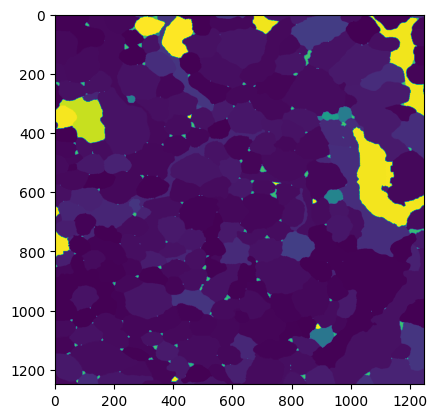

In [52]:
plt.imshow(neuron_ids[0,:,:])

In [ ]:
neuron_ids[100,1150:1200,1190:1200]

In [8]:
neuron_ids.max()

191978

In [9]:
neuron_ids.min()

885

In [10]:
(unique, counts) =  np.unique(neuron_ids, return_counts=True)

In [11]:
unique

array([   885,    886,    894, ..., 191975, 191976, 191978], dtype=uint64)

In [12]:
counts

array([   125, 758458, 864767, ...,    244,    100,    500])

In [13]:
counts.argmin()

36

In [75]:
print(unique[380], counts[380])

20474 2764008


In [76]:
clipped_neuron_ids = np.where(neuron_ids == 20474 , 1, 0)

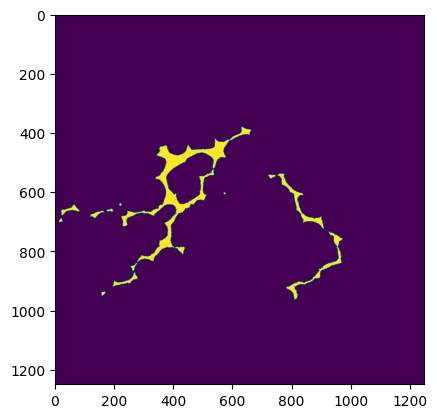

In [78]:
plt.imshow(clipped_neuron_ids[44,:,:])

In [77]:
layer_sum = np.sum(clipped_neuron_ids, axis=(1,2))
print(layer_sum.shape)
print(layer_sum)
print(layer_sum.argmax())

(125,)
[14086 14680 13868 14993 14791 14994 14639 14151 12316 12430 12783 13236
 12626 14090 15451 15502 14312 14117 15437 15250 16104 16535 20339 18948
 22348 21037 20702 19799 20230 20952 21232 22037 22325 22344 22241 25535
 23161 27449 26776 28061 29464 30312 30725 30664 31343 28929 27609 28290
 25782 26538 26655 27858 26934 28031 27239 24271 25587 28807 27850 28054
 26370 27162 25952 27952 26665 27787 26142 25324 23073 27114 25318 27580
 25512 27589 26362 28082 26162 26790 27035 27547 26630 24322 26736 25951
 27593 21269 20890 18337 20865 20375 21816 22232 21064 19523 21374 20583
 21536 21542 22534 22189 22669 23434 21791 21566 22195 22355 23706 24077
 21981 23265 20227 19723 16554 18887 18181 16276 15661 16514 16033 18488
 19726 19472 20053 21212 18234]
44


In [30]:
np.sort(counts)[::-1][:13]

array([2764008, 2661892, 2462450, 2309960, 2305678, 2166838, 2064640,
       2063282, 2042617, 1955908, 1908971, 1764786, 1744909])

In [73]:
np.sort(counts)[27000]


37

In [74]:
print([key for key, val in enumerate(counts) if val == 2764008])

[380]


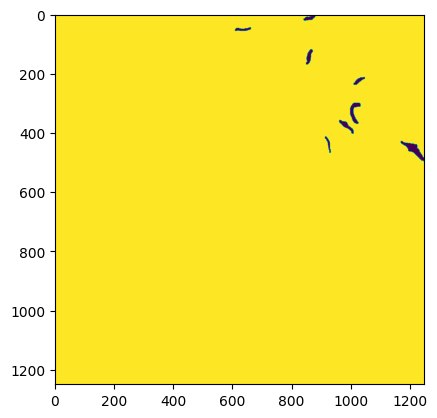

In [15]:
plt.imshow(clefts[0,:,:])